In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text


In [2]:
fights = pd.read_csv("ufcFights.csv")
fighters = pd.read_csv("ufcFighters.csv")


In [3]:
# Filter title fights where the winner (fighter1_id) won
champions = fights[(fights["title_fight"] == "Yes") & (fights["outcome"] == "win")]["fighter1_id"].unique()
# Get champion details from the fighters table
champion_data = fighters[fighters["fighter_id"].isin(champions)]
# Sort by highest Elo
champion_data = champion_data.sort_values(by="highestElo", ascending=False)
champion_data['win_percentage'] = champion_data['wins'] / (champion_data['wins'] + champion_data['losses'])
top_champions = champion_data.nlargest(50, "highestElo")
print(top_champions)



      fighter_id                   name           weightclass  wins  losses  \
1437        1438        Islam Makhachev           Lightweight    16       1   
595          596              Jon Jones     Light Heavyweight    22       2   
1356        1357           Leon Edwards          Welterweight    15       4   
1454        1455           Kamaru Usman          Welterweight    15       3   
309          310      Georges St-Pierre          Welterweight    20       2   
749          750       Charles Oliveira           Lightweight    23      11   
1551        1552         Belal Muhammad          Welterweight    15       4   
928          929           Max Holloway         Featherweight    22       8   
1611        1612  Alexander Volkanovski           Lightweight    13       3   
1079        1080         Daniel Cormier           Heavyweight    12       3   
880          881           Stipe Miocic           Heavyweight    14       5   
1759        1760        Israel Adesanya          Mid

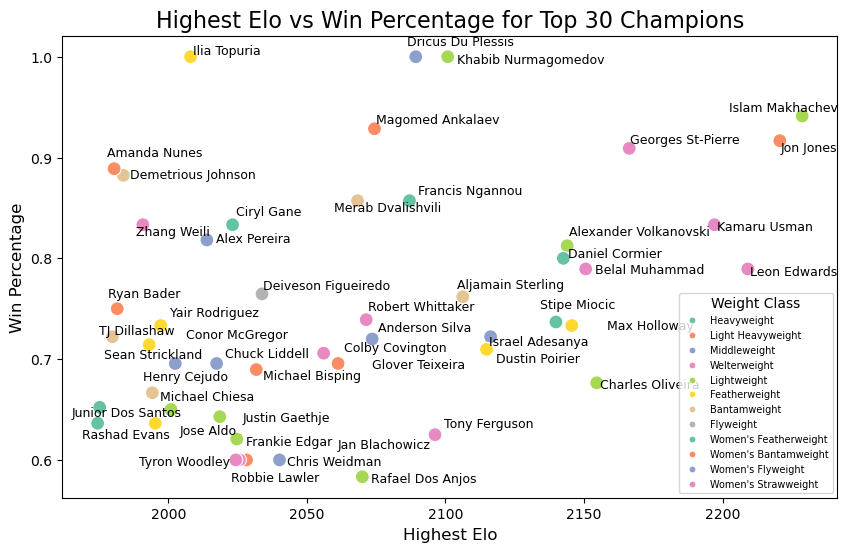

In [17]:
weight_classes = top_champions["weightclass"].unique()
color_palette = sns.color_palette("husl", len(weight_classes))  # Husl = Distinct colors
weight_class_colors = {wc: color_palette[i] for i, wc in enumerate(weight_classes)}
weight_class_order = [
    'Heavyweight', 'Light Heavyweight', 'Middleweight', 'Welterweight', 'Lightweight',
    'Featherweight', 'Bantamweight', 'Flyweight',
    'Women\'s Featherweight', 'Women\'s Bantamweight', 'Women\'s Flyweight', 'Women\'s Strawweight',
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_champions, x='highestElo', y='win_percentage', hue='weightclass', 
                palette='Set2', s=100, hue_order=weight_class_order)

# Add labels and title
plt.title('Highest Elo vs Win Percentage for Top 30 Champions', fontsize=16)
plt.xlabel('Highest Elo', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)

# Adjust legend
plt.legend(title="Weight Class", loc='lower right', fontsize=7, markerscale=0.5)

# Adjust the text labels (if needed)
texts = [plt.text(row['highestElo'], row['win_percentage'], row['name'], size=9) for _, row in top_champions.iterrows()]
adjust_text(texts)

# Show the plot
plt.show()

                    name          weight_class  highestElo  currentElo  wins  \
3              Jon Jones           Heavyweight     2220.65     2220.65    22   
4       Magomed Ankalaev     Light Heavyweight     2074.41     2074.41    13   
6      Dricus Du Plessis          Middleweight     2089.30     2089.30     9   
8         Belal Muhammad          Welterweight     2150.61     2150.61    15   
5        Islam Makhachev           Lightweight     2228.72     2228.72    16   
1           Ilia Topuria         Featherweight     2008.03     2008.03     8   
0      Merab Dvalishvili          Bantamweight     2068.31     2068.31    12   
2      Alexandre Pantoja             Flyweight     1946.41     1946.41    13   
9          Julianna Pena  Women's Bantamweight     1845.65     1845.65     8   
11  Valentina Shevchenko     Women's Flyweight     1971.69     1971.69    13   
12           Zhang Weili   Women's Strawweight     1990.83     1990.83    10   

    losses  draws  win_percentage  
3  

C:\Users\pedro\AppData\Local\Temp\ipykernel_40088\1701174538.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=current_champions, x='highestElo', y='win_percentage',


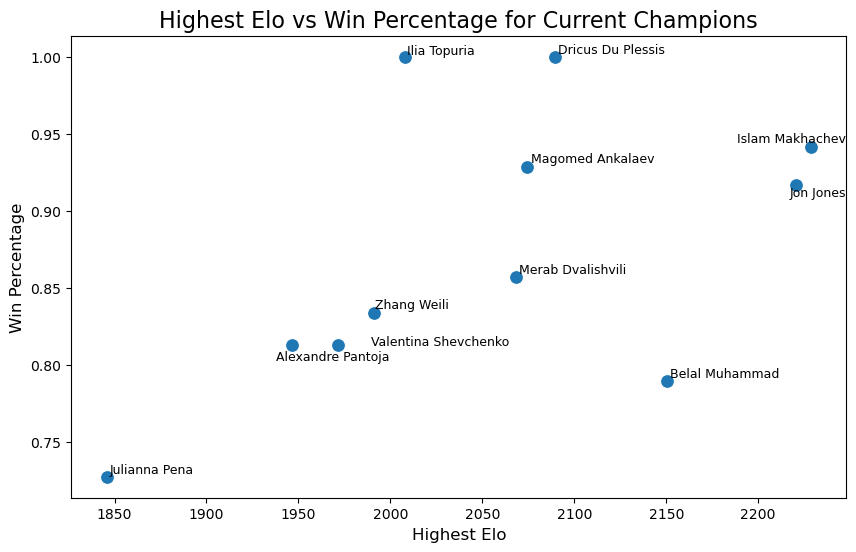

In [ ]:
# Filter only title fights and wins
title_fights = fights[fights["title_fight"] == "Yes"]
title_fights = title_fights[title_fights["outcome"] == "win"]

# Sort by event_id so we get the most recent fight per weight class
title_fights = title_fights.sort_values(by="event_id", ascending=False)

# Get the most recent winner for each weight class
current_champions = title_fights.groupby("weight_class").first().reset_index()

# Merge to get fighter details (like name, Elo, etc.)
current_champions = current_champions.merge(fighters, left_on="fighter1_id", right_on="fighter_id", how="left")
    
# Select relevant columns
current_champions = current_champions[["name", "weight_class", "highestElo", "currentElo", "wins", "losses", "draws"]]

current_champions["weight_class"] = pd.Categorical(current_champions["weight_class"], categories=weight_class_order, ordered=True)
current_champions = current_champions.sort_values("weight_class")
current_champions = current_champions[current_champions["name"] != "Kenichi Yamamoto"]
current_champions = current_champions[current_champions["name"] != "Amanda Nunes"]
current_champions['win_percentage'] = current_champions['wins'] / (current_champions['wins'] + current_champions['losses'])
print(current_champions)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=current_champions, x='highestElo', y='win_percentage', 
                palette='Set2', s=100)

# Add labels and title
plt.title('Highest Elo vs Win Percentage for Current Champions', fontsize=16)
plt.xlabel('Highest Elo', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)

# Adjust legend
#plt.legend(title="Weight Class", loc='lower right', fontsize=7, markerscale=0.5)

# Adjust the text labels (if needed)
texts = [plt.text(row['highestElo'], row['win_percentage'], row['name'], size=9) for _, row in current_champions.iterrows()]
adjust_text(texts)

# Show the plot
plt.show()

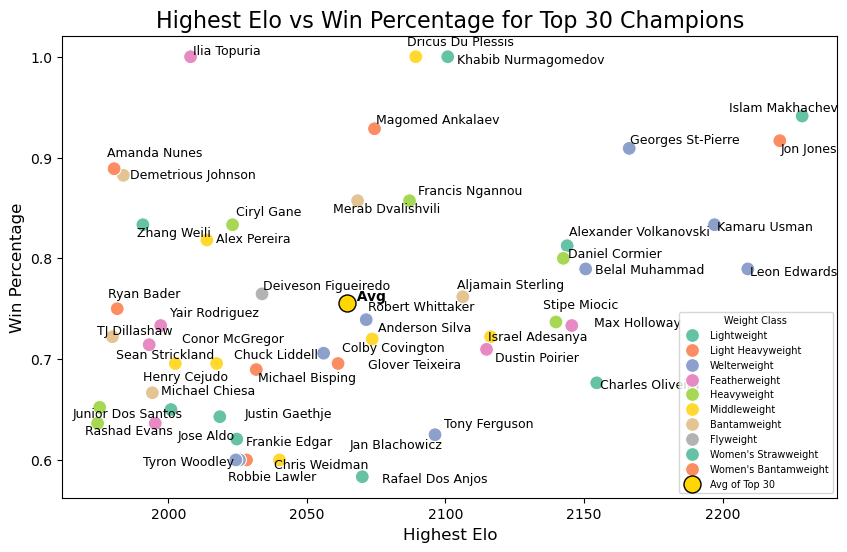

In [40]:
avg_highest_elo = top_champions["highestElo"].mean()
avg_win_percentage = top_champions["win_percentage"].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_champions, x='highestElo', y='win_percentage', hue='weightclass', palette='Set2', s=100)

# Add the gold dot for the average champion
plt.scatter(avg_highest_elo, avg_win_percentage, color='gold', edgecolors='black', s=150, marker='o', label="Avg of Top 30")

# Add label for clarity
plt.text(avg_highest_elo, avg_win_percentage, "  Avg", fontsize=10, verticalalignment='bottom', fontweight='bold', color='black')

# Adjust legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Weight Class", fontsize=7, title_fontsize=7, loc="lower right")

texts = [plt.text(row['highestElo'], row['win_percentage'], row['name'], size=9) for _, row in top_champions.iterrows()]
adjust_text(texts)

# Add title and labels
plt.title('Highest Elo vs Win Percentage for Top 30 Champions', fontsize=16)
plt.xlabel('Highest Elo', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)

# Show the plot
plt.show()

In [43]:
advancedStats = pd.read_csv("ufcAdvancedStats.csv")